# Machine Learning Engineer Nanodegree
## Federal Reserve Interest Rates
## Project: Predicting

Federal Reserve directly affects mortgage, credit card, or prices rising in the product that we buy. Therefore the Federal Reserve sets interest rates to promote conditions that achieve high employment, low and stable inflation, sustainable economic growth, and moderate long-term interest rates. The Fed monitors inflation indicators to manage inflation. When indicators rise more than 3% a year, the Fed raises the federal funds rate to keep rising prices under control.

Higher interest rates mean higher borrowing costs, so consumers and businesses borrow less and spend less. Demand for goods and services drop, and inflation falls. On the other hand, falling interest rates result when the Fed lowers the federal funds rate. Borrowing becomes cheaper and people spend more. This can end a recession.

The data was obtained by the Federal Reserve Bank of St. Louis' economic data portal.

- consumer price index https://fred.stlouisfed.org/graph/?g=8dGq&utm_campaign=graph&utm_content=&utm_medium=Referral&utm_source=fred.stlouisfed.org&utm_term=related_resources
- unemployment https://fred.stlouisfed.org/series/UNRATE
- gross domestic product https://fred.stlouisfed.org/series/A191RL1Q225SBEA

# Exploring the Data

Fed dataset has 904 data points with 7 variables each.


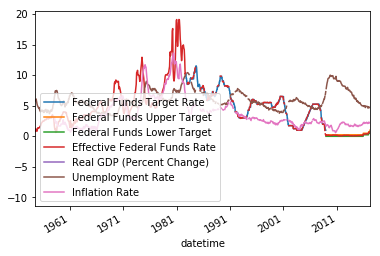

In [574]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display
from matplotlib import pyplot
# from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the federal reserve dataset
try:
    data = pd.read_csv('index.csv',index_col='datetime', parse_dates={'datetime': ['Year','Month','Day']}, date_parser=lambda x: pd.datetime.strptime(x, '%Y %m %d'))
    print "Fed dataset has {} data points with {} variables each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

data.plot()
pyplot.show()

In [280]:
# Display a description of the dataset
display(data.describe())

,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
count,462.000000,103.000000,103.000000,721.000000,239.000000,721.000000,679.000000
mean,5.658415,0.308252,0.058252,4.490222,3.280753,5.900416,3.408984
std,2.553891,0.140917,0.140917,2.992071,3.441303,1.541694,2.097089
min,1.000000,0.250000,0.000000,0.070000,-10.000000,3.400000,0.600000
25%,3.750000,0.250000,0.000000,2.270000,1.400000,4.900000,1.950000
50%,5.500000,0.250000,0.000000,4.490000,3.100000,5.600000,2.700000
75%,7.750000,0.250000,0.000000,6.170000,4.950000,6.900000,4.500000
max,11.500000,1.000000,0.750000,13.780000,16.500000,10.800000,11.700000


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

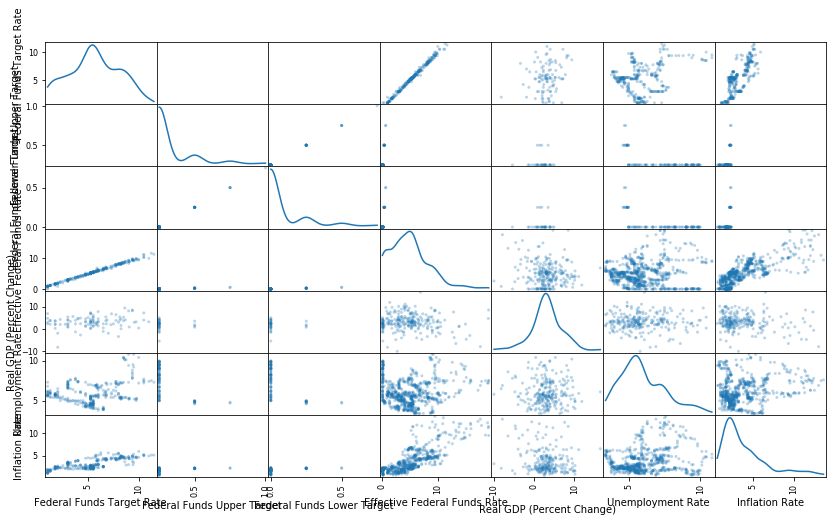

In [575]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [591]:
print data.corr()

                              Federal Funds Target Rate  \
Federal Funds Target Rate                      1.000000   
Federal Funds Upper Target                          NaN   
Federal Funds Lower Target                          NaN   
Effective Federal Funds Rate                   0.996450   
Real GDP (Percent Change)                      0.207719   
Unemployment Rate                              0.282460   
Inflation Rate                                 0.761163   

                              Federal Funds Upper Target  \
Federal Funds Target Rate                            NaN   
Federal Funds Upper Target                      1.000000   
Federal Funds Lower Target                      1.000000   
Effective Federal Funds Rate                    0.937782   
Real GDP (Percent Change)                       0.016265   
Unemployment Rate                              -0.557939   
Inflation Rate                                  0.429528   

                              Federal Funds Lo

# Implementation: Feature Scaling

If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural algorithm.

/Users/jovanimartinezrico/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/jovanimartinezrico/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


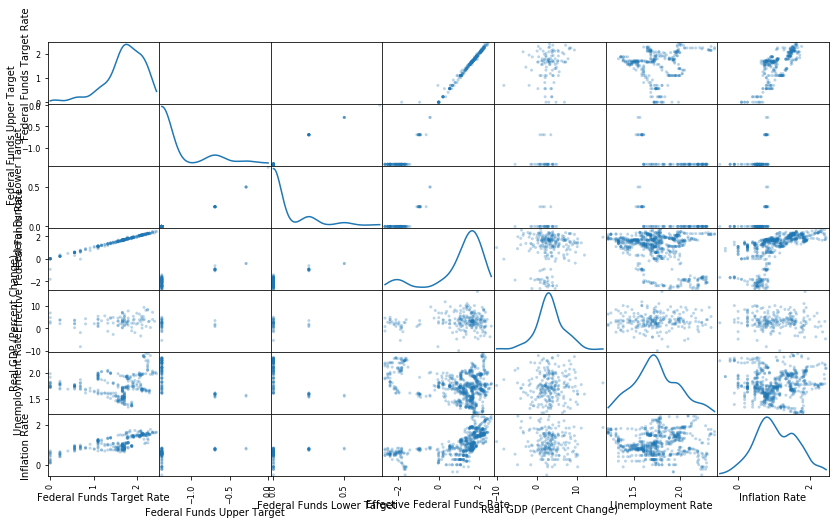

In [539]:
# data_log = data
data_log = np.log(data)
data_log['Real GDP (Percent Change)'] = data['Real GDP (Percent Change)']
data_log['Federal Funds Lower Target'] = data['Federal Funds Lower Target']
# data_log['Federal Funds Target Rate'] = data['Federal Funds Target Rate']

pd.plotting.scatter_matrix(data_log, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

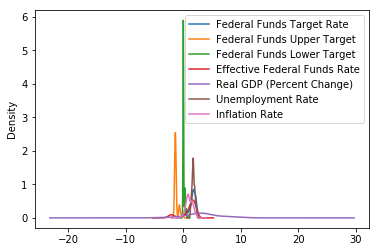

In [544]:
data_log.plot.kde()

# Eliminating Outliers

The early 1980s recession is one of the key factor


https://en.wikipedia.org/wiki/Early_1980s_recession

In [566]:
data_outlier = data.loc[datetime.date(year=1983,month=1,day=1):]
print data_outlier.head()

            Federal Funds Target Rate  Federal Funds Upper Target  \
datetime                                                            
1983-01-01                      8.500                         NaN   
1983-02-01                      8.500                         NaN   
1983-03-01                      8.500                         NaN   
1983-03-31                      8.625                         NaN   
1983-04-01                      8.625                         NaN   

            Federal Funds Lower Target  Effective Federal Funds Rate  \
datetime                                                               
1983-01-01                         NaN                          8.68   
1983-02-01                         NaN                          8.51   
1983-03-01                         NaN                          8.77   
1983-03-31                         NaN                           NaN   
1983-04-01                         NaN                          8.80   

           

# Identify feature and target columns
The code below will identify the features and separate the target column from the dataset, at the end it will create:

- features - the dataset cotaininng only the feature columns.
- interest_rate - the target column.

In [553]:
interest_rate = data_outlier['Effective Federal Funds Rate']
features = data_outlier.drop(['Effective Federal Funds Rate','Federal Funds Lower Target'], axis = 1)
print "\nTarget column:\n {}".format(interest_rate.head())
print "\nDataset column:\n {}".format(features.head())


Target column:
 datetime
1983-01-01    8.68
1983-02-01    8.51
1983-03-01    8.77
1983-03-31     NaN
1983-04-01    8.80
Name: Effective Federal Funds Rate, dtype: float64

Dataset column:
             Federal Funds Target Rate  Federal Funds Upper Target  \
datetime                                                            
1983-01-01                      8.500                         NaN   
1983-02-01                      8.500                         NaN   
1983-03-01                      8.500                         NaN   
1983-03-31                      8.625                         NaN   
1983-04-01                      8.625                         NaN   

            Real GDP (Percent Change)  Unemployment Rate  Inflation Rate  
datetime                                                                  
1983-01-01                        5.3               10.4             4.7  
1983-02-01                        NaN               10.4             4.7  
1983-03-01                

# Data Manipulation

Change the NaN values

In [554]:
interest_rate = interest_rate.fillna(0)
features = features.fillna(0)
print "\nTarget column:\n {}".format(interest_rate.head())
print "\nDataset column:\n {}".format(features.head())


Target column:
 datetime
1983-01-01    8.68
1983-02-01    8.51
1983-03-01    8.77
1983-03-31    0.00
1983-04-01    8.80
Name: Effective Federal Funds Rate, dtype: float64

Dataset column:
             Federal Funds Target Rate  Federal Funds Upper Target  \
datetime                                                            
1983-01-01                      8.500                         0.0   
1983-02-01                      8.500                         0.0   
1983-03-01                      8.500                         0.0   
1983-03-31                      8.625                         0.0   
1983-04-01                      8.625                         0.0   

            Real GDP (Percent Change)  Unemployment Rate  Inflation Rate  
datetime                                                                  
1983-01-01                        5.3               10.4             4.7  
1983-02-01                        0.0               10.4             4.7  
1983-03-01                

# Implementation: Training and Testing Data Split

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 66% training and 33% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [577]:
from sklearn.model_selection import TimeSeriesSplit
def split_data(X, y):
    print "********************Splitting the Data******************"
    tscv = TimeSeriesSplit(n_splits=2)
    print tscv

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(features, interest_rate)
# Success
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

********************Splitting the Data******************
TimeSeriesSplit(n_splits=2)
Training set has 372 samples.
Testing set has 186 samples.


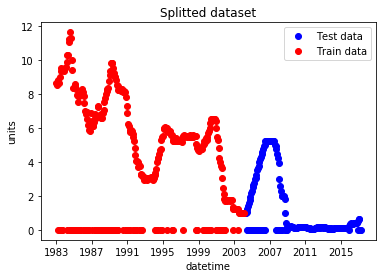

In [580]:
def plot_split_results(X_test, X_train, y_test, y_train):
    stock_date_test = pd.DataFrame()
    stock_date_train = pd.DataFrame()
    stock_date_test['datetime'] = X_test.index
    stock_date_train['datetime'] = X_train.index
    
    fig, ax = plt.subplots()
    ax.plot_date(stock_date_test, y_test, color ='b', label = 'Test data', linewidth=1)
    ax.plot_date(stock_date_train, y_train, color ='r', label = 'Train data', linewidth=1)
    ax.set_xlabel('datetime')
    ax.set_ylabel('units')
    
    plt.legend()
    plt.title('Splitted dataset')
    plt.show()
    
plot_split_results(X_test, X_train, y_test, y_train)

# Benchmark

In [557]:
from sklearn.dummy import DummyRegressor

def benchmark(X_train, X_test, y_train, y_test):
    model = DummyRegressor()
    model.fit(X_train, y_train)
    print 'DummyRegressor Model {}'.format(model.score(X_test, y_test))
    return model

benchmark(X_train, X_test, y_train, y_test)

DummyRegressor Model -2.56281297338


DummyRegressor(constant=None, quantile=None, strategy='mean')

In [410]:
def fit_model(x, y, estimator):
    # Indicate the classifier and the training set size
    print "Training model: {}. Training set size: {}. . .".format(estimator.__class__.__name__, len(x))
    estimator.fit(x, y)
    # Return the trained model
    return estimator

# Choosing the Best Model

In this section, will help to choose from the supervised learning models the best model to use on the interest rate data.

## Evaluating Model Performance
I will construct a model and make a prediction on the interest rate feature set using an optimized model from `fit_model`.

In [581]:
import sklearn.learning_curve as curves
from sklearn.model_selection import KFold

def plot_learning_curve(regressor, title, X, y):
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    plt.figure()
    plt.title(title)
    plt.grid()
    
    # Calculate the training and testing scores
    sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
                                                             cv = cv, train_sizes = train_sizes, scoring = 'r2')
    # Find the mean and standard deviation for smoothing
    train_std = np.std(train_scores, axis = 1)
    train_mean = np.mean(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    
    # Subplot the learning curve 
    plt.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
    plt.fill_between(sizes, train_mean - train_std,train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Labels
    plt.xlabel("Number of Training Points")
    plt.ylabel("Score")
    plt.legend(loc="best")

In [412]:
from sklearn.model_selection import cross_val_predict

def plot_regression(estimator, x, y):
    # cross_val_predict returns an array of the same size as `y` where each entry
    # is a prediction obtained by cross validation:
    predicted = cross_val_predict(estimator, x, y, cv=10)

    fig, ax = plt.subplots()
    ax.scatter(y, predicted)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

# Import the models

Train a model using the: Linear Regression, HuberRegressor and RandomForest Regressor. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the parametera for each algorithm.

Training model: LinearRegression. Training set size: 372. . .
Score: 0.378437341433


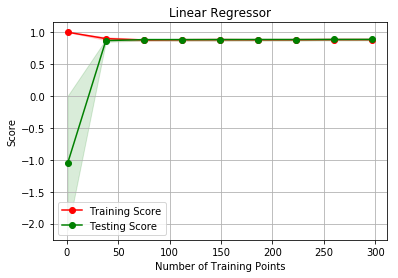

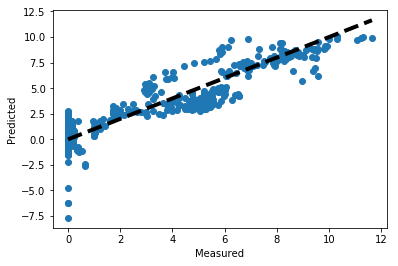

In [582]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet, HuberRegressor
from sklearn.ensemble import RandomForestRegressor
#Fit the training data to the model using grid search using LinearRegression
plot_learning_curve(linear_reg, 'Linear Regressor', X_train, y_train)
linear_reg = fit_model(X_train, y_train, LinearRegression())
print "Score: {}".format(linear_reg.score(X_test, y_test))
plot_regression(LinearRegression(), features, interest_rate)
plt.show()

Training model: HuberRegressor. Training set size: 372. . .
Score: 0.414764348592


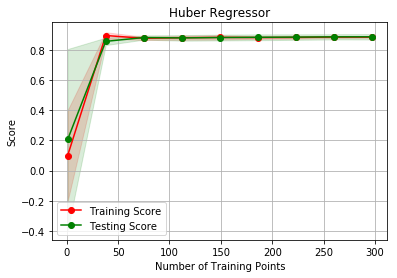

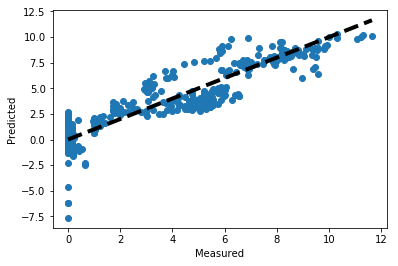

In [583]:
# Fit the training data to the model using grid search using Lasso
huberRegressor_reg = fit_model(X_train, y_train, HuberRegressor())
print "Score: {}".format(huberRegressor_reg.score(X_test, y_test))
plot_learning_curve(huberRegressor_reg, 'Huber Regressor', X_train, y_train)
plot_regression(HuberRegressor(), features, interest_rate)
plt.show()

Training model: RandomForestRegressor. Training set size: 372. . .
Score: 0.770937114391


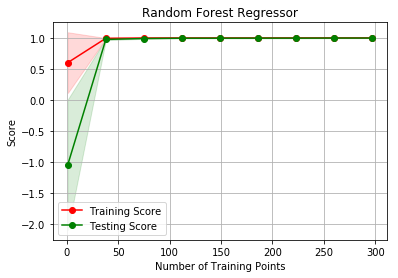

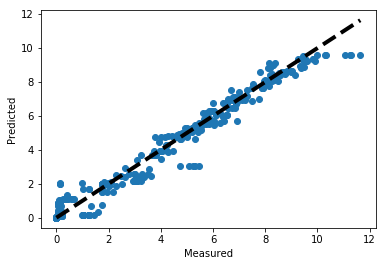

In [584]:
#Fit the training data to the model using grid search using LinearRegression
randomForest_reg = fit_model(X_train, y_train, RandomForestRegressor(random_state=42))
print "Score: {}".format(randomForest_reg.score(X_test, y_test))
plot_learning_curve(randomForest_reg, 'Random Forest Regressor', X_train, y_train)
plot_regression(RandomForestRegressor(), features, interest_rate)
plt.show()

# Implementation: Model Tuning

Fine tune the chosen model. Use grid search (GridSearchCV) with at least one important parameter tuned with at least different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:

    - Import sklearn.grid_search.GridSearchCV and sklearn.metrics.make_scorer.
    - Create a dictionary of parameters you wish to tune for the chosen model. Example: parameters = {'parameter' : [list of values]}.
    - Initialize the classifier you've chosen and store it in clf.
    - Create the R2 scoring function using make_scorer and store it in r2_scorer.
    - Set the pos_label parameter to the correct value!
    - Perform grid search on the classifier clf using f1_scorer as the scoring method, and store it in grid_obj.
    - Fit the grid search object to the training data (X_train, y_train), and store it in grid_obj.

In [378]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score

def tunning_fit_model(X, y,regressor, params):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

Score: 0.378437341433


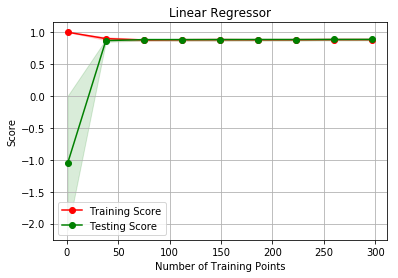

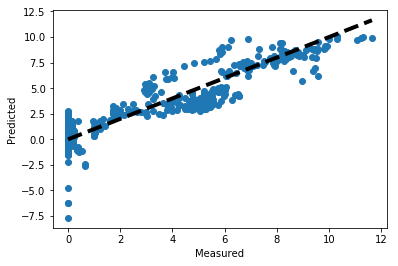

In [587]:
# Fit the training data to the model using grid search
tunning_linear_reg = tunning_fit_model(X_train, y_train, LinearRegression(),{'fit_intercept': (True, False), 'normalize':(True, False), 'copy_X':(True, False)})
print "Score: {}".format(tunning_linear_reg.score(X_test, y_test))
plot_learning_curve(tunning_linear_reg, 'Linear Regressor', X_train, y_train)
plot_regression(tunning_linear_reg, features, interest_rate)
plt.show()

Score: 0.414764348592


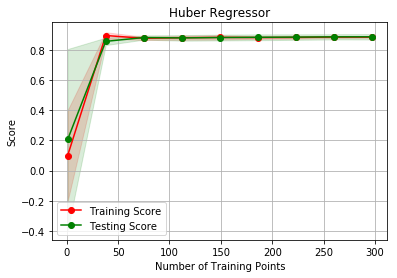

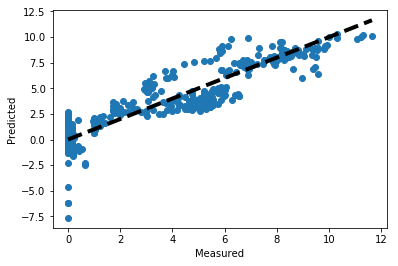

In [589]:
# Fit the training data to the model using grid search using Lasso
tunning_huberRegressor_reg = tunning_fit_model(X_train, y_train, HuberRegressor(),{'epsilon':[1.2,1.35],'alpha':[0.01, 0.001, 0.0001, 0.00001],'warm_start':(True,False), 'fit_intercept': (True, False)})
print "Score: {}".format(tunning_huberRegressor_reg.score(X_test, y_test))
# Cross validation to get smoother mean test and train
plot_learning_curve(tunning_huberRegressor_reg, 'Huber Regressor', X_train, y_train)
plot_regression(tunning_huberRegressor_reg, features, interest_rate)
plt.show()

Score: 0.774603967025


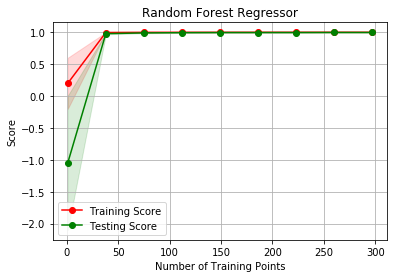

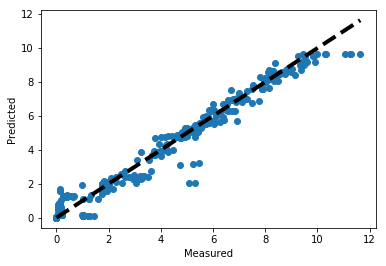

In [586]:
#Fit the training data to the model using grid search using LinearRegression
tunning_randomForest_reg = tunning_fit_model(X_train, y_train, RandomForestRegressor(),{'random_state':[1,42],'n_estimators':[200,100,50,10,150], 'warm_start':(True,False)})
print "Score: {}".format(tunning_randomForest_reg.score(X_test, y_test))
plot_learning_curve(tunning_randomForest_reg, 'Random Forest Regressor', X_train, y_train)
plot_regression(tunning_randomForest_reg, features, interest_rate)
plt.show()

## Predicting Interest Rate

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

In [590]:
# # Load information to predict
prediction_data = pd.read_csv('prediction.csv',index_col='datetime', parse_dates={'datetime': ['Year','Month','Day']}, date_parser=lambda x: pd.datetime.strptime(x, '%Y %m %d'))
print prediction_data

prediction_data = prediction_data.drop(['Federal Funds Lower Target','Federal Funds Target Rate'], axis = 1)

# # Show predictions
print "Predicted interest rate using Linear Regression: {}".format(tunning_linear_reg.predict(prediction_data))
# print "interest rate = {} + {}XFederal_Target_Rate + {}XFederal_Upper_Rate + {}XFederal_Lower_Rate + {}XReal GDP + {}XUnemployment_Rate + {}XInflation_Rate".format(tunning_linear_reg.intercept_,*tunning_linear_reg.coef_)
# print tunning_linear_reg.score(X_test,y_test)

print "------------------------------------------------------------------------"
print "Predicted interest rate using Bayesian Regression: {}".format(tunning_huberRegressor_reg.predict(prediction_data))

print "------------------------------------------------------------------------"
print "Predicted interest rate using RandomForest Regression: {}".format(tunning_randomForest_reg.predict(prediction_data))


            Federal Funds Target Rate  Federal Funds Upper Target  \
datetime                                                            
2017-06-01                          0                        0.25   
2017-07-01                          0                        0.25   
2017-08-01                          0                        0.75   
2018-01-01                          1                        0.00   

            Federal Funds Lower Target  Effective Federal Funds Rate  \
datetime                                                               
2017-06-01                         0.0                             1   
2017-07-01                         0.0                             0   
2017-08-01                         0.5                             0   
2018-01-01                         0.0                             0   

            Real GDP (Percent Change)  Unemployment Rate  Inflation Rate  
datetime                                                                  
20